In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

In [14]:
# Create a simple signal
f0 = 60 #Hz
T0 = 1/f0 #sec
w = 2*np.pi*f0 #radian

dt = 1/12/f0/10
t = np.arange(0,1/f0*3 - dt,dt)
v1 = 10*np.sin(2*np.pi*f0*t + np.pi/4)
i1 =  5*np.sin(2*np.pi*f0*t)
v1_clean = v1
i1_clean = i1

In [15]:
#sample the signal at 1/12 rate
t_s = t.reshape(36,10)[:,1]
v1_clean_s = v1_clean.reshape(36,10)[:,1]
i1_clean_s = i1_clean.reshape(36,10)[:,1]

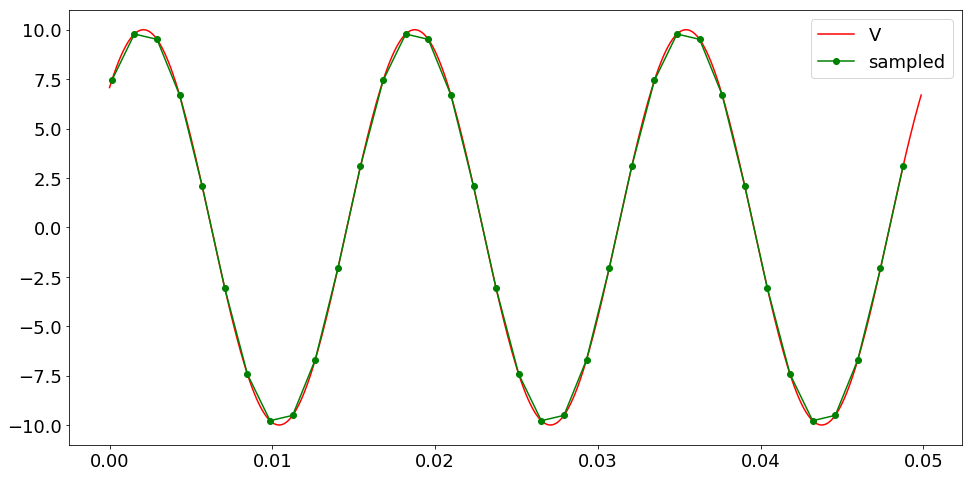

In [16]:
plt.plot(t,v1_clean,color='r',label='V')
plt.plot(t_s,v1_clean_s,color='g',label='sampled',marker='o')
plt.legend()
plt.show()

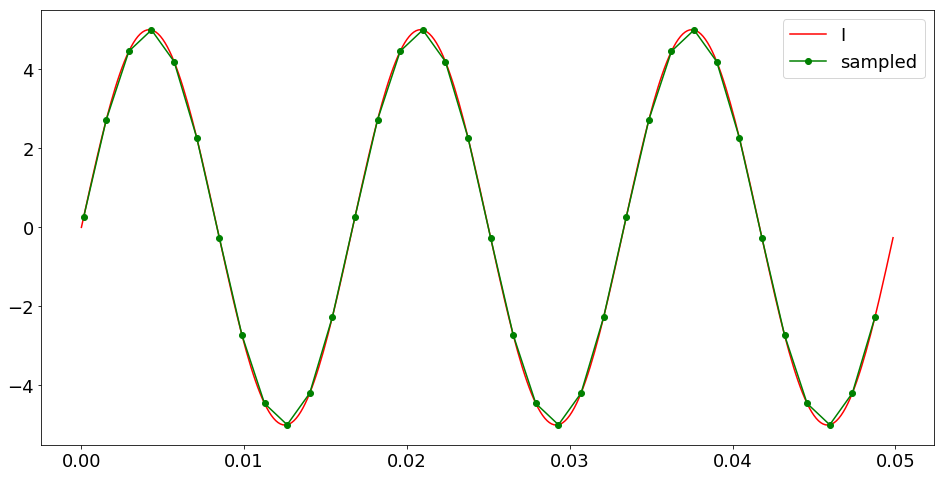

In [17]:
plt.plot(t,i1_clean,color='r',label='I')
plt.plot(t_s,i1_clean_s,color='g',label='sampled',marker='o')
plt.legend()
plt.show()

In [18]:
K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/K

for q in range(0,24):
    inp_V = v1_clean_s[q:ws+q] #moving data window of size ws, starting with 6th sample
    inp_I = i1_clean_s[q:ws+q]
    
    Vr1,Vr2,Ir1,Ir2 = 0,0,0,0
    for k in range(1,ws+1):
        Vr1 = Vr1 + inp_V[k-1]*np.cos(k*theta)*(T0/K)#мб надо к-1 сделать для косинуса и все что ниже
        Vr2 = Vr2 + inp_V[k-1]*np.sin(k*theta)*(T0/K)
        Ir1 = Ir1 + inp_I[k-1]*np.cos(k*theta)*(T0/K)
        Ir2 = Ir2 + inp_I[k-1]*np.sin(k*theta)*(T0/K)
    
    Im1 = inp_I[ws-1]*np.sin(ws*theta) - inp_I[0]*np.sin(1*theta) - w*Ir1
    Im2 = inp_I[ws-1]*np.cos(ws*theta) - inp_I[0]*np.cos(1*theta) + w*Ir2
    #print(Ir1,Ir2,Im1,Im2)
    
    R = (Im1*Vr1 - Im2*Vr2)/(Ir1*Im1 - Ir2*Im2)
    L = (Ir1*Vr2 - Ir2*Vr1)/(Ir1*Im1 - Ir2*Im2)
    Z = np.sqrt(R**2 + (w*L)**2)
    
    print(f'R = {R:.2f}',f'X = {w*L:.2f}',f'Z = {Z:.2f}')   

R = 1.16 X = 1.99 Z = 2.30
R = 1.77 X = 1.90 Z = 2.60
R = 1.85 X = 1.37 Z = 2.30
R = 1.56 X = 1.10 Z = 1.90
R = 1.20 X = 1.12 Z = 1.65
R = 0.95 X = 1.46 Z = 1.74
R = 1.16 X = 1.99 Z = 2.30
R = 1.77 X = 1.90 Z = 2.60
R = 1.85 X = 1.37 Z = 2.30
R = 1.56 X = 1.10 Z = 1.90
R = 1.20 X = 1.12 Z = 1.65
R = 0.95 X = 1.46 Z = 1.74
R = 1.16 X = 1.99 Z = 2.30
R = 1.77 X = 1.90 Z = 2.60
R = 1.85 X = 1.37 Z = 2.30
R = 1.56 X = 1.10 Z = 1.90
R = 1.20 X = 1.12 Z = 1.65
R = 0.95 X = 1.46 Z = 1.74
R = 1.16 X = 1.99 Z = 2.30
R = 1.77 X = 1.90 Z = 2.60
R = 1.85 X = 1.37 Z = 2.30
R = 1.56 X = 1.10 Z = 1.90
R = 1.20 X = 1.12 Z = 1.65
R = 0.95 X = 1.46 Z = 1.74


In [19]:
K = 12  #samples in cycle
ws = 6 #samples in window
theta = 2*np.pi/K
dT = (T0/K)

for q in range(0,24):
    T = q*dT
    inp_V = v1_clean_s[q:q+ws] #moving data window of size ws, starting with 6th sample
    inp_I = i1_clean_s[q:q+ws]
    
    Vr1,Vr2,Ir1,Ir2 = 0,0,0,0
    for i in range(0,ws):
        Vr1 = Vr1 + inp_V[i]*np.cos(w*(T+i*dT))*dT#мб надо к-1 сделать для косинуса и все что ниже
        Vr2 = Vr2 + inp_V[i]*np.sin(w*(T+i*dT))*dT
        Ir1 = Ir1 + inp_I[i]*np.cos(w*(T+i*dT))*dT
        Ir2 = Ir2 + inp_I[i]*np.sin(w*(T+i*dT))*dT
    
    Im1 = inp_I[ws-1]*np.sin(w*(T+ws)) - inp_I[0]*np.sin(w*T) - w*Ir1
    Im2 = inp_I[ws-1]*np.cos(w*(T+ws)) - inp_I[0]*np.cos(w*T) + w*Ir2
    
    R = (Im1*Vr1 - Im2*Vr2)/(Ir1*Im1 - Ir2*Im2)
    L = (Ir1*Vr2 - Ir2*Vr1)/(Ir1*Im1 - Ir2*Im2)
    Z = np.sqrt(R**2 + (w*L)**2)
    
    print(f'R = {R:.2f}',f'X = {w*L:.2f}',f'Z = {Z:.2f}')

R = 1.40 X = 1.13 Z = 1.80
R = 1.84 X = 2.08 Z = 2.78
R = 3.38 X = 2.42 Z = 4.16
R = 3.01 X = 1.33 Z = 3.29
R = 2.26 X = 0.86 Z = 2.42
R = 1.72 X = 0.82 Z = 1.90
R = 1.40 X = 1.13 Z = 1.80
R = 1.84 X = 2.08 Z = 2.78
R = 3.38 X = 2.42 Z = 4.16
R = 3.01 X = 1.33 Z = 3.29
R = 2.26 X = 0.86 Z = 2.42
R = 1.72 X = 0.82 Z = 1.90
R = 1.40 X = 1.13 Z = 1.80
R = 1.84 X = 2.08 Z = 2.78
R = 3.38 X = 2.42 Z = 4.16
R = 3.01 X = 1.33 Z = 3.29
R = 2.26 X = 0.86 Z = 2.42
R = 1.72 X = 0.82 Z = 1.90
R = 1.40 X = 1.13 Z = 1.80
R = 1.84 X = 2.08 Z = 2.78
R = 3.38 X = 2.42 Z = 4.16
R = 3.01 X = 1.33 Z = 3.29
R = 2.26 X = 0.86 Z = 2.42
R = 1.72 X = 0.82 Z = 1.90


In [24]:
def Vr1(t,n_t,ws,v_t):#t-time[sec],n_t-#of time sample,ws-window size,v_t-voltage samples
    res = 0
    for i in range(n_t,n_t+ws+1):
        res = res + v_t[i]*np.cos(w*i*dT)*dT
    return res

def Vr2(t,n_t,ws,v_t):
    res = 0
    for i in range(n_t,n_t+ws+1):
        res = res + v_t[i]*np.sin(w*i*dT)*dT
    return res

def Ir1(t,n_t,ws,i_t):
    res = 0
    for i in range(n_t,n_t+ws+1):
        res = res + i_t[i]*np.cos(w*i*dT)*dT
    return res

def Ir2(t,n_t,ws,i_t):
    res = 0
    for i in range(n_t,n_t+ws+1):
        res = res + i_t[i]*np.sin(w*i*dT)*dT
    return res

def Im1(t,n_t,ws,i_t):
    res = i_t[n_t+ws]*np.sin(w*(t+ws*dT)) - i_t[n_t]*np.sin(w*t) - w*Ir1(t,n_t,ws,i_t)  
    return res

def Im2(t,n_t,ws,i_t):
    res = i_t[n_t+ws]*np.cos(w*(t+ws*dT)) - i_t[n_t]*np.cos(w*t) + w*Ir2(t,n_t,ws,i_t)  
    return res

In [25]:
K = 12
dT = (T0/K)
ws = 6
for n_t in range(0,24):
    t = n_t*dT
    R = (Im1(t,n_t,ws,i1_clean_s)*Vr1(t,n_t,ws,v1_clean_s) - Im2(t,n_t,ws,i1_clean_s)*Vr2(t,n_t,ws,v1_clean_s)) / (Ir1(t,n_t,ws,i1_clean_s)*Im1(t,n_t,ws,i1_clean_s) - Ir2(t,n_t,ws,i1_clean_s)*Im2(t,n_t,ws,i1_clean_s))
    L = (Ir1(t,n_t,ws,i1_clean_s)*Vr2(t,n_t,ws,v1_clean_s) - Ir2(t,n_t,ws,i1_clean_s)*Vr1(t,n_t,ws,v1_clean_s)) / (Ir1(t,n_t,ws,i1_clean_s)*Im1(t,n_t,ws,i1_clean_s) - Ir2(t,n_t,ws,i1_clean_s)*Im2(t,n_t,ws,i1_clean_s))
    Z = np.sqrt(R**2 + (w*L)**2)
    
    print(f'R = {R:.2f}',f'X = {w*L:.2f}',f'Z = {Z:.2f}')

R = 1.47 X = 1.88 Z = 2.39
R = 1.82 X = 1.53 Z = 2.38
R = 1.69 X = 1.17 Z = 2.05
R = 1.38 X = 1.06 Z = 1.74
R = 1.09 X = 1.22 Z = 1.63
R = 1.03 X = 1.63 Z = 1.92
R = 1.47 X = 1.88 Z = 2.39
R = 1.82 X = 1.53 Z = 2.38
R = 1.69 X = 1.17 Z = 2.05
R = 1.38 X = 1.06 Z = 1.74
R = 1.09 X = 1.22 Z = 1.63
R = 1.03 X = 1.63 Z = 1.92
R = 1.47 X = 1.88 Z = 2.39
R = 1.82 X = 1.53 Z = 2.38
R = 1.69 X = 1.17 Z = 2.05
R = 1.38 X = 1.06 Z = 1.74
R = 1.09 X = 1.22 Z = 1.63
R = 1.03 X = 1.63 Z = 1.92
R = 1.47 X = 1.88 Z = 2.39
R = 1.82 X = 1.53 Z = 2.38
R = 1.69 X = 1.17 Z = 2.05
R = 1.38 X = 1.06 Z = 1.74
R = 1.09 X = 1.22 Z = 1.63
R = 1.03 X = 1.63 Z = 1.92


In [26]:
K = 120
dT = (T0/K)
ws = 60
for n_t in range(0,240):
    t = n_t*dT
    R = (Im1(t,n_t,ws,i1)*Vr1(t,n_t,ws,v1) - Im2(t,n_t,ws,i1)*Vr2(t,n_t,ws,v1)) / (Ir1(t,n_t,ws,i1)*Im1(t,n_t,ws,i1) - Ir2(t,n_t,ws,i1)*Im2(t,n_t,ws,i1))
    L = (Ir1(t,n_t,ws,i1)*Vr2(t,n_t,ws,v1) - Ir2(t,n_t,ws,i1)*Vr1(t,n_t,ws,v1)) / (Ir1(t,n_t,ws,i1)*Im1(t,n_t,ws,i1) - Ir2(t,n_t,ws,i1)*Im2(t,n_t,ws,i1))
    Z = np.sqrt(R**2 + (w*L)**2)
    
    print(f'R = {R:.2f}',f'X = {w*L:.2f}',f'Z = {Z:.2f}')

R = 1.41 X = 1.46 Z = 2.03
R = 1.42 X = 1.46 Z = 2.04
R = 1.42 X = 1.46 Z = 2.04
R = 1.43 X = 1.46 Z = 2.04
R = 1.43 X = 1.46 Z = 2.04
R = 1.44 X = 1.45 Z = 2.05
R = 1.44 X = 1.45 Z = 2.05
R = 1.45 X = 1.45 Z = 2.05
R = 1.45 X = 1.45 Z = 2.05
R = 1.45 X = 1.44 Z = 2.05
R = 1.46 X = 1.44 Z = 2.05
R = 1.46 X = 1.43 Z = 2.04
R = 1.46 X = 1.43 Z = 2.04
R = 1.46 X = 1.42 Z = 2.04
R = 1.46 X = 1.42 Z = 2.04
R = 1.46 X = 1.41 Z = 2.03
R = 1.46 X = 1.41 Z = 2.03
R = 1.46 X = 1.40 Z = 2.02
R = 1.46 X = 1.40 Z = 2.02
R = 1.46 X = 1.39 Z = 2.02
R = 1.45 X = 1.39 Z = 2.01
R = 1.45 X = 1.39 Z = 2.01
R = 1.45 X = 1.38 Z = 2.00
R = 1.44 X = 1.38 Z = 2.00
R = 1.44 X = 1.38 Z = 1.99
R = 1.44 X = 1.37 Z = 1.99
R = 1.43 X = 1.37 Z = 1.98
R = 1.43 X = 1.37 Z = 1.98
R = 1.42 X = 1.37 Z = 1.98
R = 1.42 X = 1.37 Z = 1.97
R = 1.41 X = 1.37 Z = 1.97
R = 1.41 X = 1.37 Z = 1.96
R = 1.40 X = 1.37 Z = 1.96
R = 1.40 X = 1.37 Z = 1.96
R = 1.40 X = 1.37 Z = 1.96
R = 1.39 X = 1.37 Z = 1.96
R = 1.39 X = 1.38 Z = 1.95
R